# Cardivascular Disease Predication

## Exploratory Data Analysis (EDA)

For Exploratory Data Analysis (EDA), we first imported the necessary libraries.

The main library used for handling data is **`pandas`**, which allows us to create and manipulate dataframes.

For data visualization, we use **`matplotlib`** and **`seaborn`** to generate informative plots. 

We also use **`scipy`** and **`numpy`** for statistical analysis and numerical computations.

### Importing Required Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats
import numpy as np

### •Initial Data Inspection:

In [2]:
data = pd.read_csv("../data/raw/cardio_train.csv", sep=";")
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


### Check data types

In [3]:
print(data.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


### Null Values

In [4]:
print(data.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


### Check Duplicates

In [6]:
print(data.duplicated().sum())

0


### Dimensionality

In [7]:
print(data.shape)

(70000, 13)


#### • Descriptive Statistics:

In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**The issues should be addressed to clean the data before proceeding with machine learning models**

Age Column: The mean age value is unusually high (19468.87), indicating that the age might be in hundredths of a year. This column needs to be converted to actual years.

Blood Pressure (ap_hi, ap_lo): There are extreme and likely erroneous values, such as -150 for ap_hi and -70 for ap_lo. These need to be corrected or removed.

Binary Variables (smoke, alco, active): Ensure these binary variables only contain values 0 and 1, as there might be incorrect or inconsistent entries

### Skewness

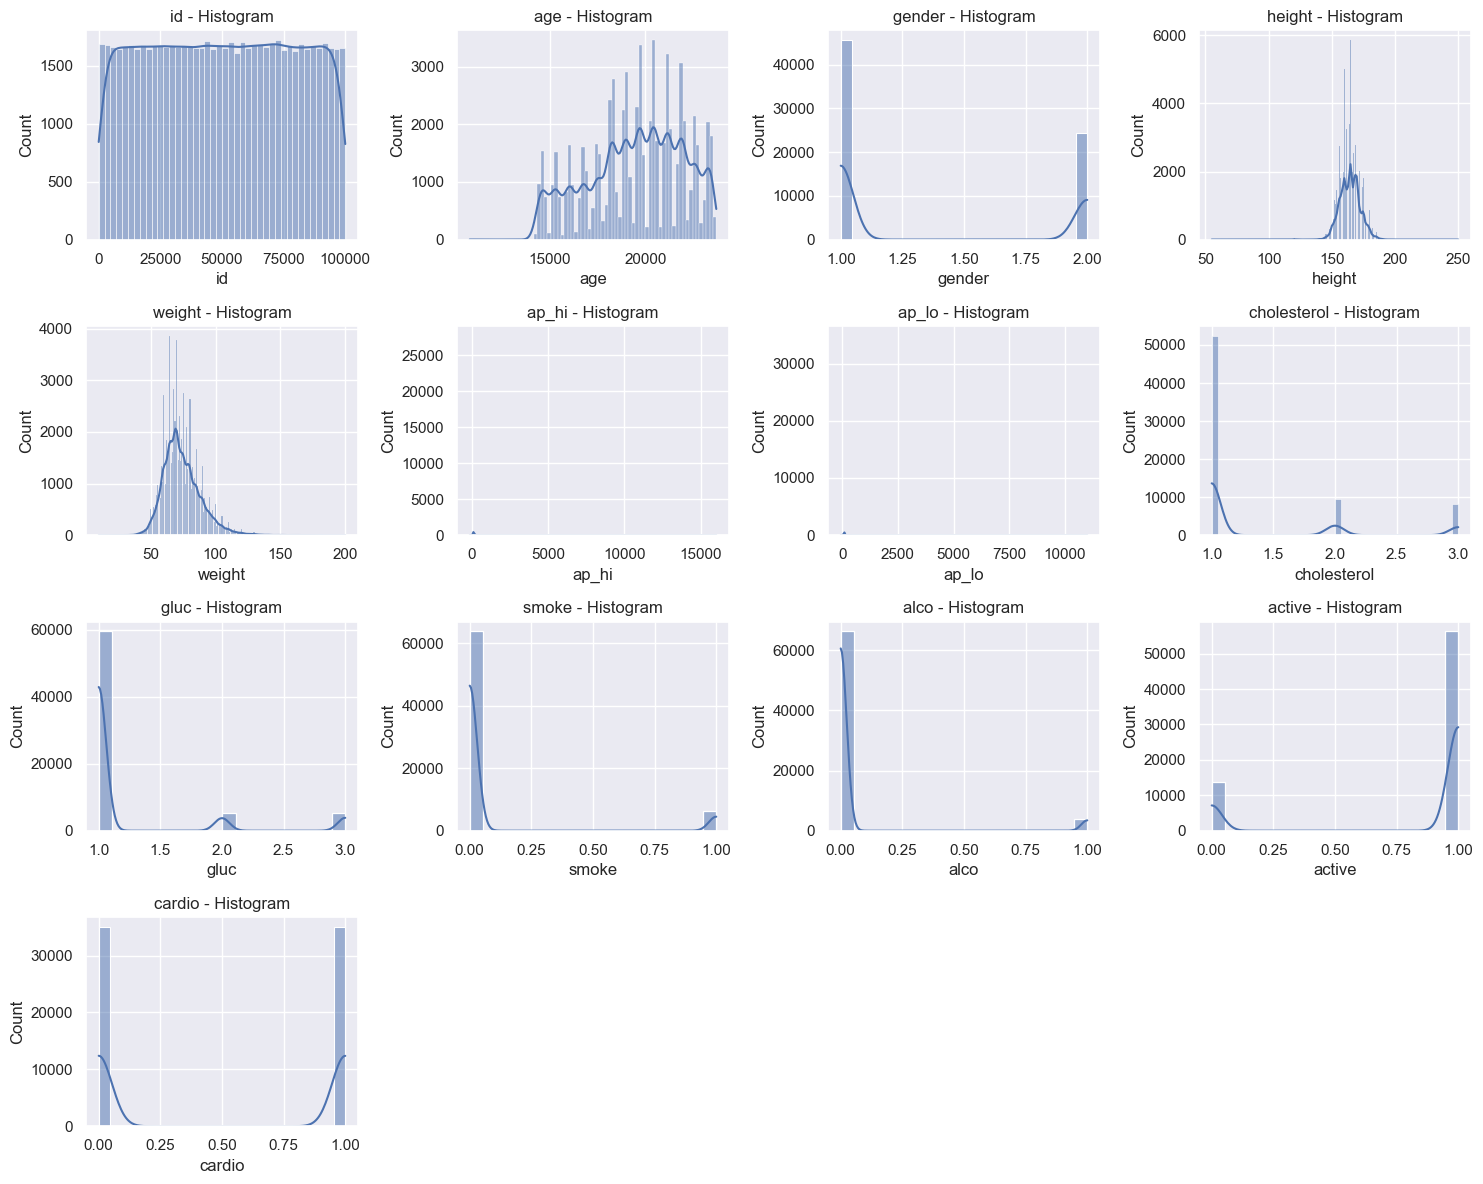

In [11]:
# Plot histograms for each numerical feature
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} - Histogram')

plt.tight_layout()
plt.show()

#### Interpretation
Columns with high variance (e.g., id, age, ap_hi, ap_lo) may have a wide spread in values, which could indicate useful features for predictive modeling, but some columns like id should be discarded as they do not hold predictive power.

Columns with low variance (e.g., gender, smoke, alco, cardio) indicate less variability in the data, which might mean they don’t contribute much in terms of differentiating between observations, especially if they are binary features.

### Outliers Detection :

#### BoxPlot

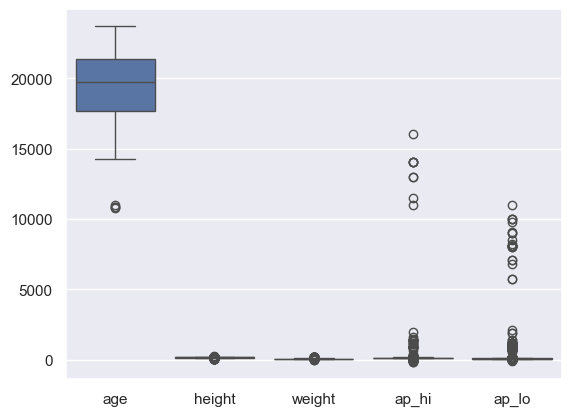

In [12]:
sns.boxplot(data=data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.show()

### IQR Method :

In [13]:
# Calculate IQR for numerical features
Q1 = data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].quantile(0.25)
Q3 = data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] < (Q1 - 1.5 * IQR)) |
                (data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] > (Q3 + 1.5 * IQR)))

print(outliers_iqr)

         age  height  weight  ap_hi  ap_lo
0      False   False   False  False  False
1      False   False   False  False  False
2      False   False   False  False  False
3      False   False   False  False  False
4      False   False   False  False   True
...      ...     ...     ...    ...    ...
69995  False   False   False  False  False
69996  False   False    True  False  False
69997  False   False   False   True  False
69998  False   False   False  False  False
69999  False   False   False  False  False

[70000 rows x 5 columns]


### 📊 Visualization Summary

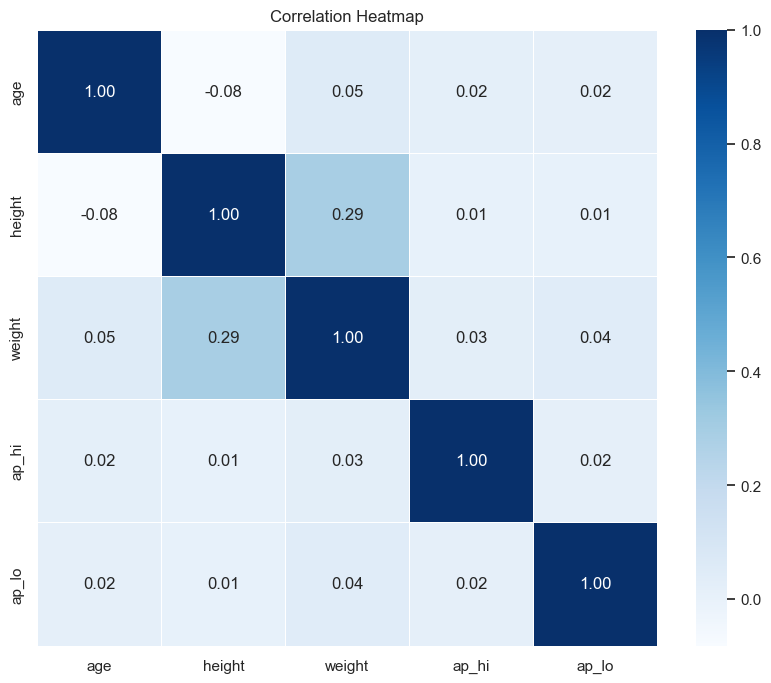

In [18]:
# Calculate the correlation matrix
correlation_matrix = data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidth=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**From this correlation matrix, we can understand that all data is unique and not strongly correlated with each other.**

It’s also worth noting that some attributes are highly correlated with the target

#### Histograms for numerical features

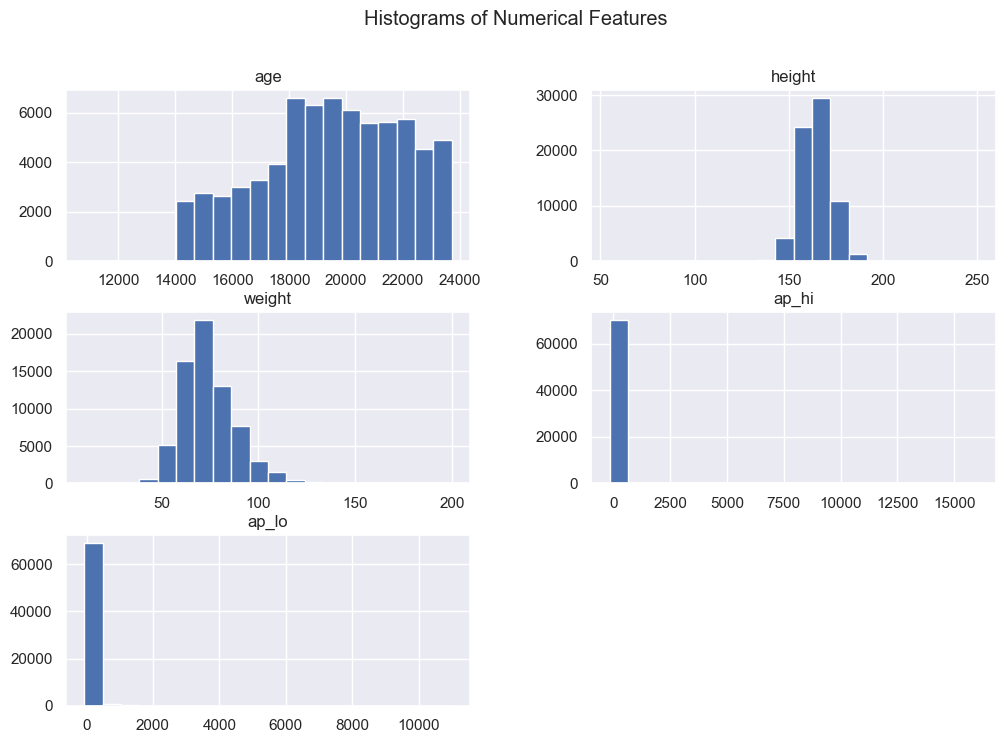

In [19]:
# Plot histograms for numerical features
data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

#### Scatterplots:

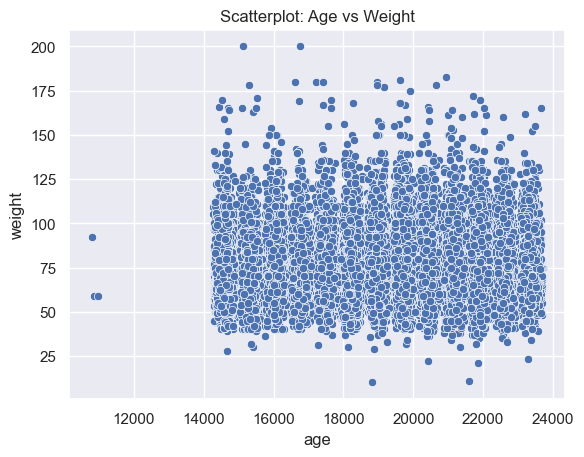

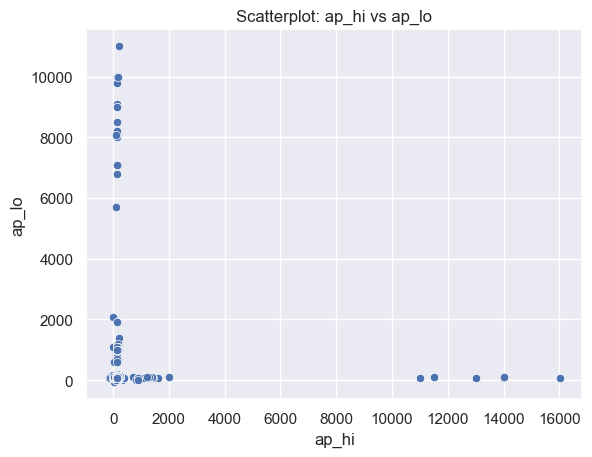

In [20]:
# Scatterplot between age and weight
sns.scatterplot(x='age', y='weight', data=data)
plt.title("Scatterplot: Age vs Weight")
plt.show()

# Scatterplot between ap_hi and ap_lo
sns.scatterplot(x='ap_hi', y='ap_lo', data=data)
plt.title("Scatterplot: ap_hi vs ap_lo")
plt.show()

#### Pairplot

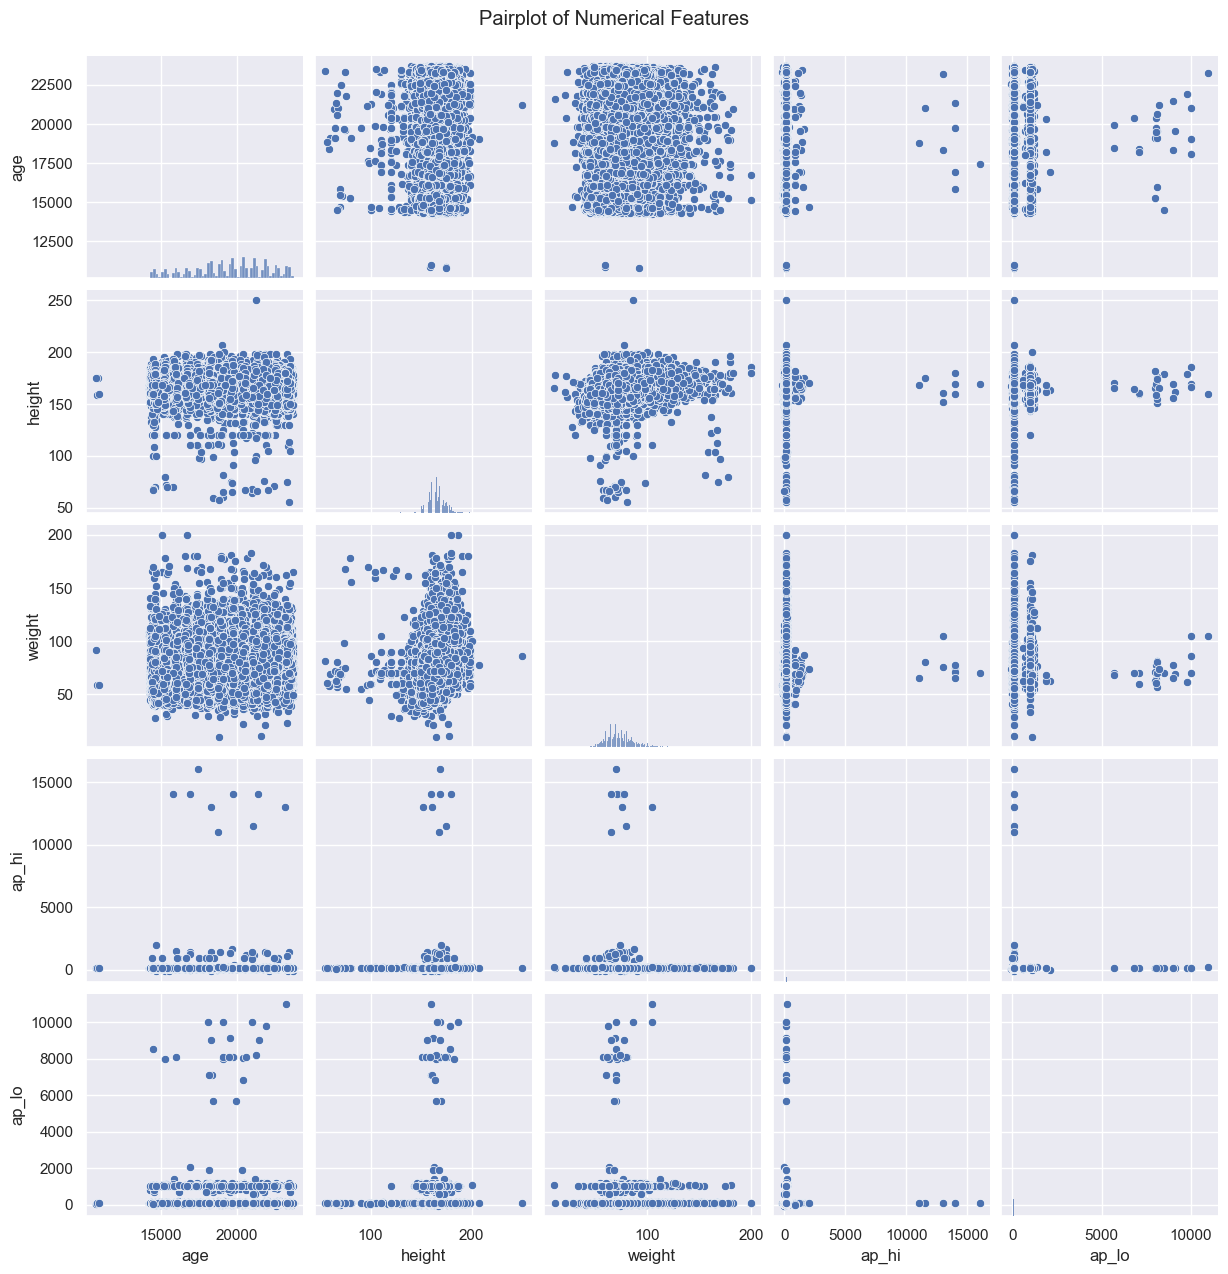

In [21]:
# Pairplot for numerical features
sns.pairplot(data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

#### Countplot

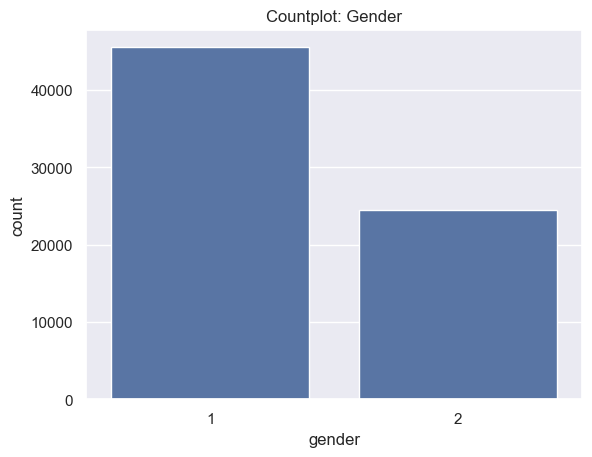

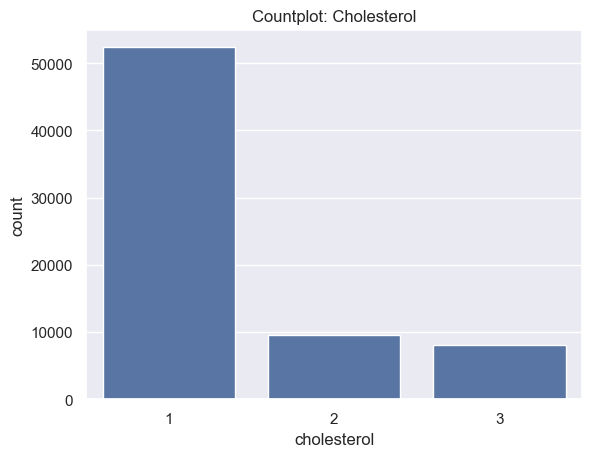

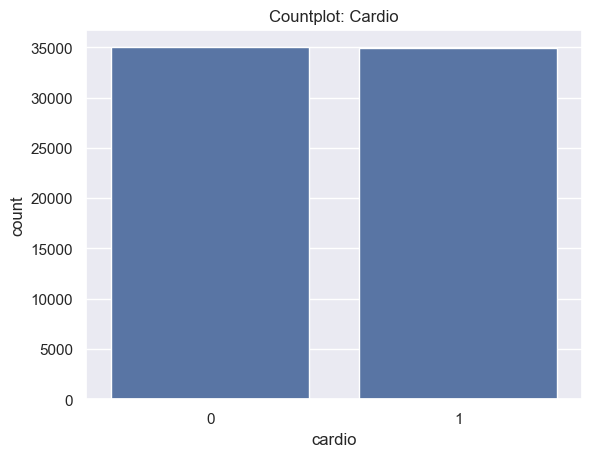

In [22]:
# Countplot for gender
sns.countplot(x='gender', data=data)
plt.title("Countplot: Gender")
plt.show()

# Countplot for cholesterol
sns.countplot(x='cholesterol', data=data)
plt.title("Countplot: Cholesterol")
plt.show()

# Countplot for cardio (target variable)
sns.countplot(x='cardio', data=data)
plt.title("Countplot: Cardio")
plt.show()

#### Barcharts

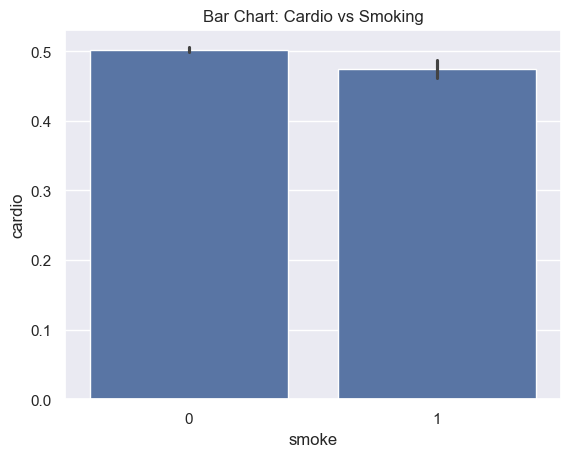

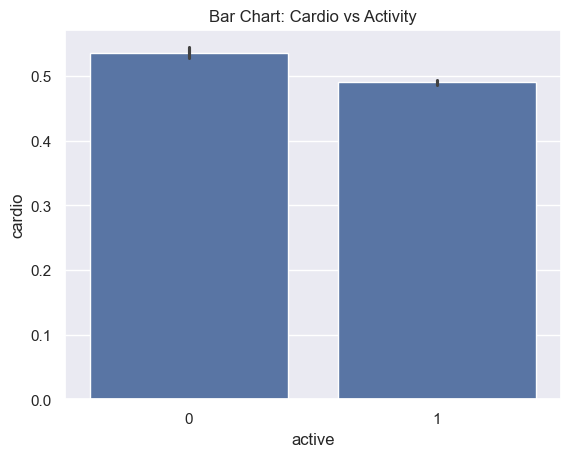

In [23]:
# Bar chart for relationship between cardio and smoking
sns.barplot(x='smoke', y='cardio', data=data)
plt.title("Bar Chart: Cardio vs Smoking")
plt.show()

# Bar chart for relationship between cardio and activity level
sns.barplot(x='active', y='cardio', data=data)
plt.title("Bar Chart: Cardio vs Activity")
plt.show()

### 📊 **Summary of Visualizations**  

🔹 **Correlation Heatmap** – Examines relationships between numerical variables.  

🔹 **Scatterplots** – Explores relationships between pairs of numerical features.  

🔹 **Pairplot** – Provides insights into multiple feature relationships simultaneously.  

🔹 **Count Plot** – Displays the frequency distribution of categorical features.  

🔹 **Bar Charts** – Analyzes relationships between categorical variables and the target variable.  

💡 *These visualizations help in understanding patterns, correlations, and feature importance for better model performance!* 🚀